#Install Packages


In [ ]:
!pip install scikit-plot

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 42.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 43.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

 93% 15.0M/16.1M [00:01<00:00, 20.9MB/s]
100% 16.1M/16.1M [00:01<00:00, 12.3MB/s]


In [ ]:
!unzip /content/real-or-fake-fake-jobposting-prediction.zip

Archive:  /content/real-or-fake-fake-jobposting-prediction.zip
  inflating: fake_job_postings.csv   


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
df = pd.read_csv('fake_job_postings.csv')

In [ ]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<ipython-input-16-1b325da5c485>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-16-1b325da5c485>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)


<Axes: >

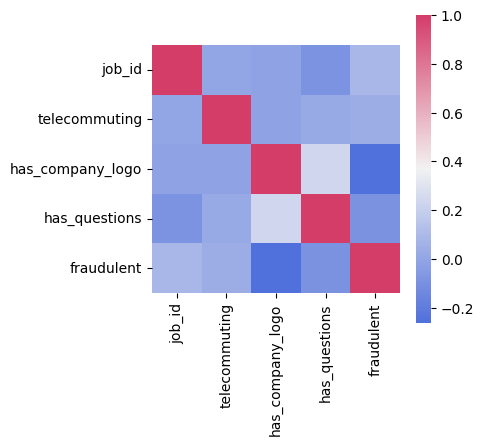

In [ ]:
plt.figure(figsize = (4,4))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

In [ ]:
df.drop(labels=['job_id','salary_range'],axis=1,inplace=True)

In [ ]:
df.shape

(17880, 16)

In [ ]:
df.fillna(" ",inplace = True)

In [ ]:
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
df.head(2)

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0


In [ ]:
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' '+ df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']+' '+df['employment_type'] + ' ' + df['required_experience'] + ' '+df['required_education'] +' '+ df['industry'] + ' '+df['function']

In [ ]:
df.text[2]

"Commissioning Machinery Assistant (CMA) US, IA, Wever   Valor Services provides Workforce Solutions that meet the needs of companies across the Private Sector, with a special focus on the Oil &amp; Gas Industry.\xa0Valor Services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer.\xa0Valor Services was founded with the vision of employing the unique skills, experiences, and qualities of America’s finest veterans to provide Private Sector companies with precise and concerted value-added services – and America’s finest Veterans with an optimized career opportunity.We are eager to get the word out to veterans that there are ample opportunities for employment in the private sector and that you are the ideal candidates to fill those positions.\xa0Valor Services\xa0Your Success is Our Mission.\xa0™\xa0 Our client, located in Houston, is actively s

In [ ]:
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['telecommuting']
del df['has_company_logo']
del df['has_questions']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

In [ ]:
df.head(2)

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,"Customer Service - Cloud Video Production NZ, ..."


#Data Cleaning

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-6bsy5wv1
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-6bsy5wv1
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=4e4627a0bd0c2617a9c7508b1a302051ec81f08e9e29b8610f14ddb6b0058ccb
  Stored in directory: /tmp/pip-ephem-wheel-cache-00tku81y/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)

    return x

In [ ]:
df['text']=df['text'].apply(lambda x: get_clean(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


<Axes: xlabel='fraudulent', ylabel='count'>

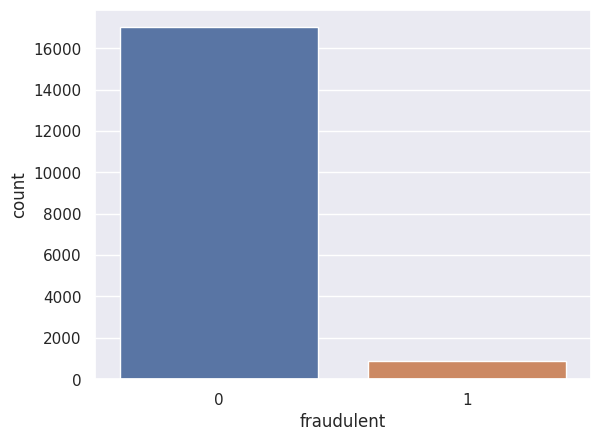

In [ ]:
sns.set(style="darkgrid")
sns.countplot(x = "fraudulent" , data = df)

In [ ]:
df.text[2]

'marketing intern us ny new york marketing were food52 and weve created a groundbreaking and awardwinning cooking site we support connect and celebrate home cooks and give them everything they need in one placewe have a top editorial business and engineering team were focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish wellknown professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random housefood52 has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today showwere located in chelsea in new york city food52 a fastgrowing james beard awardwinning online food community and crowdsourced and curated recip

#Model Building

In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
from sklearn.model_selection import train_test_split

X = df['text'].to_list()
y = df['fraudulent'].to_list()

x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12342,stratify=y)

In [ ]:
model_name='bert-base-uncased'
t=text.Transformer(model_name,maxlen=510,classes=[0,1])
trn=t.preprocess_train(x_train,y_train)
val=t.preprocess_test(x_val,y_val)
model=t.get_classifier()

/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


preprocessing train...
language: en
train sequence lengths:
	mean : 384
	95percentile : 770
	99percentile : 986


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 374
	95percentile : 748
	99percentile : 970


In [ ]:
learner=ktrain.get_learner(model,train_data=trn,val_data=val,batch_size=6)

In [ ]:
learner.fit_onecycle(1e-5,2)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/2
2384/2384 [==============================] - 696s 280ms/step - loss: 0.1437 - accuracy: 0.9589 - val_loss: 0.0646 - val_accuracy: 0.9790
Epoch 2/2
2384/2384 [==============================] - 665s 279ms/step - loss: 0.0469 - accuracy: 0.9868 - val_loss: 0.0423 - val_accuracy: 0.9871


In [ ]:
learner.model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
learner.validate(class_names=['Real','Fraudulent'])

112/112 [==============================] - 48s 393ms/step
              precision    recall  f1-score   support

        Real       0.99      0.99      0.99      3403
  Fraudulent       0.89      0.84      0.86       173

    accuracy                           0.99      3576
   macro avg       0.94      0.92      0.93      3576
weighted avg       0.99      0.99      0.99      3576



array([[3385,   18],
       [  28,  145]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
predictor=ktrain.get_predictor(learner.model,preproc=t)


In [ ]:
y_pred=predictor.predict(x_val)

In [ ]:
y_prob=predictor.predict_proba(x_val)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

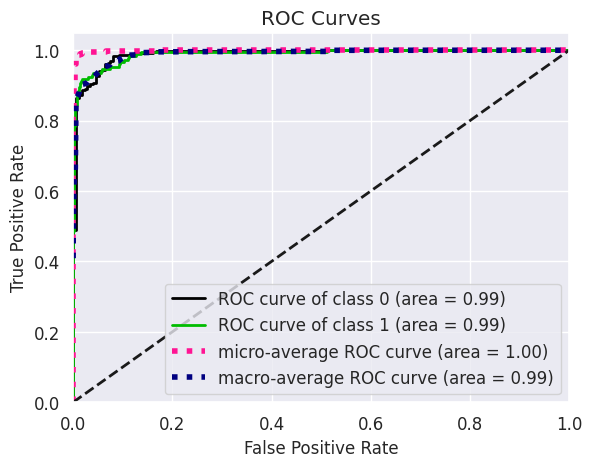

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_val,y_prob)

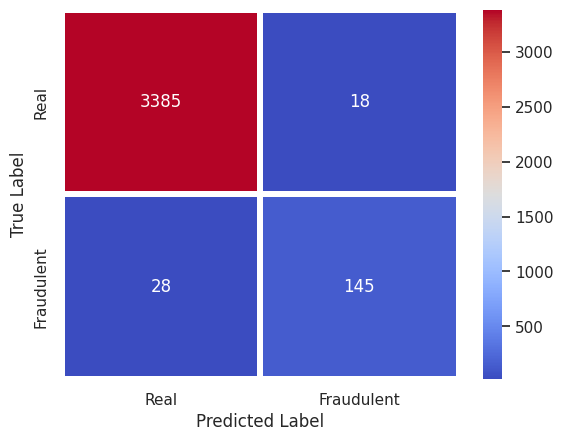

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cm=metrics.confusion_matrix(y_val,y_pred)
ax=sns.heatmap(cm,annot=True,fmt='d',cmap="coolwarm",linewidths=4,xticklabels=['Real','Fraudulent'],yticklabels=['Real','Fraudulent'])
ax.set(xlabel='Predicted Label',
       ylabel="True Label",
       )
plt.show()
